In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Tyre Compound and Degradation Adjustments

This sheet details the procedure used to generate driver specific tyre compound and degradation adjustments that will be added to the simulation model. 

After applying the fuel adjustments to the observed lap times in the database, the time difference (s) delta between this adjusted lap time and each driver's qualifying time for a given race will be compared against the tyre life with respect to the compound being run. 

As an example, to assess how Lewis Hamilton manages a set of Medium compound tyres, all of his fuel adjusted lap times will be compared to his qualifying time, generating the delta. The adjusted laptimes on Mediums from the United States Grand Prix will be compared to his qualifying time for the United States Grand Prix. The adjusted laptimes on Mediums from the Bahrain Grand Prix will be compared to his qualifying time for the Bahrain Grand Prix. Taking the delta this way keeps it within context of the race being run. 

Since the base time is being used as the first component of the model, comparing the deltas over a stint with respect to this base time provides insight into the adjustments needed for Driver's tyre management, and also for the compound being run. 

## Example: Lewis Hamilton Soft/Medium/Hard compound adjustments

In [2]:
qd = pd.read_csv("quali_delta_fb.csv")

qd_ham = qd[qd["DriverNumber"]==44]
ham_soft = qd_ham[qd_ham["Compound"]=="SOFT"]
ham_medium = qd_ham[qd_ham["Compound"]=="MEDIUM"]
ham_hard = qd_ham[qd_ham["Compound"]=="HARD"]

Below the compound and management adjustment for Lewis running the Soft compound is represented. The slope and intercept will be applied similar to how fuel burn.

[0.03855946560318355, 2.3942026968825276]


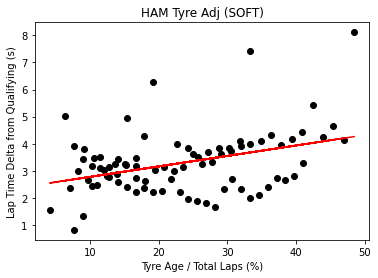

In [3]:

x = ham_soft["TyreLife_perc"]
y = ham_soft["quali_delta"]

fig = plt.figure()
plt.scatter(x, y, color = 'black')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'red')

plt.ylabel('Lap Time Delta from Qualifying (s)')
plt.xlabel('Tyre Age / Total Laps (%)')
plt.title('HAM Tyre Adj (SOFT)')
print([m,b])

[-0.0007669505233400283, 3.702261724503044]


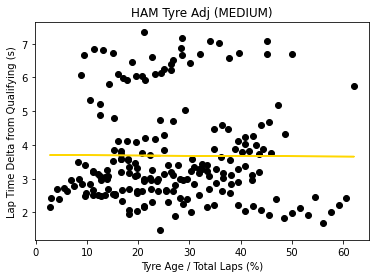

In [15]:

x = ham_medium["TyreLife_perc"]
y = ham_medium["quali_delta"]

fig = plt.figure()
plt.scatter(x, y, color = 'black')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'gold')

plt.ylabel('Lap Time Delta from Qualifying (s)')
plt.xlabel('Tyre Age / Total Laps (%)')
plt.title('HAM Tyre Adj (MEDIUM)')
print([m,b])

[0.026348666473470637, 3.417467025364221]


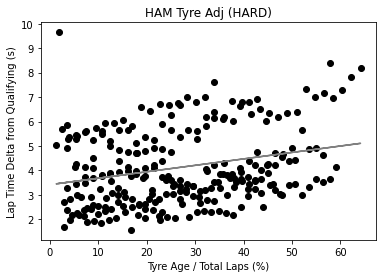

In [16]:
x = ham_hard["TyreLife_perc"]
y = ham_hard["quali_delta"]

fig = plt.figure()
plt.scatter(x, y, color = 'black')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'gray')

plt.ylabel('Lap Time Delta from Qualifying (s)')
plt.xlabel('Tyre Age / Total Laps (%)')
plt.title('HAM Tyre Adj (HARD)')
print([m,b])